# Q2

<h2>

Suppose that we have four observations, for which we compute a dissimilarity matrix, given by:

\begin{bmatrix}
     & 0.3  & 0.4  & 0.7 \\
0.3  &      & 0.5  & 0.8 \\
0.4  & 0.5  &      & 0.45 \\
0.7  & 0.8  & 0.45 &  
\end{bmatrix}


For instance, the dissimilarity between the first and second observations is **0.3**, and the dissimilarity between the second and fourth observations is **0.8**.

<h2>

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

## (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

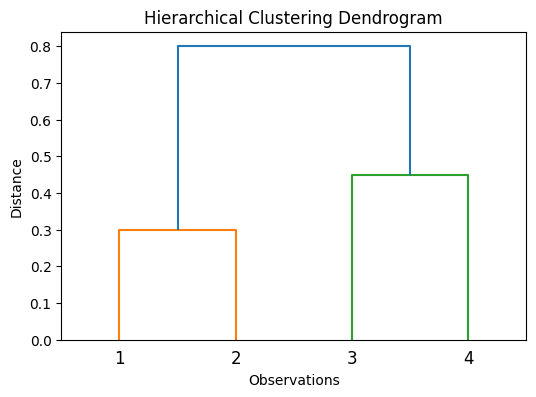

In [11]:
dissimilarity_matrix = [
    [0, 0.3, 0.4, 0.7],
    [0.3, 0, 0.5, 0.8],
    [0.4, 0.5, 0, 0.45],
    [0.7, 0.8, 0.45, 0]
]

dist = squareform(dissimilarity_matrix)
linked = linkage(dist, method='complete')
labelList = ['1', '2', '3', '4']
plt.figure(figsize=(6,4))
dendrogram(linked, labels=labelList)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()


In [15]:
linked

array([[0.  , 1.  , 0.3 , 2.  ],
       [2.  , 4.  , 0.4 , 3.  ],
       [3.  , 5.  , 0.45, 4.  ]])

## (b) Repeat (a), this time using single linkage clustering.

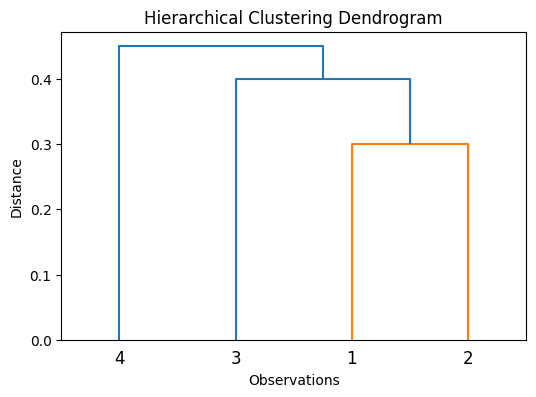

In [12]:
linked = linkage(dist, method='single')
labelList = ['1', '2', '3', '4']
plt.figure(figsize=(6,4))
dendrogram(linked, labels=labelList)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

## (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

In [ ]:
# {1,2}, {3,4}

## (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

In [14]:
# {1,2,3}, {4}

## (e) It is mentioned in this chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

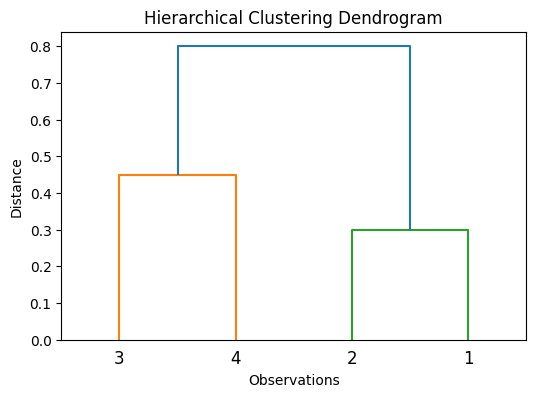

In [23]:
linked = linkage(dist, method='complete',)
linked[2][0], linked[2][1] = linked[2][1], linked[2][0]
linked[0][0], linked[0][1] = linked[0][1], linked[0][0]


labelList = ['1', '2', '3', '4']
plt.figure(figsize=(6,4))
dendrogram(linked, labels=labelList)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

# Q3

<h1>
In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

| Observation | X1 | X2 |
|-------------|----|----|
| 1           | 1  | 4  |
| 2           | 1  | 3  |
| 3           | 0  | 4  |
| 4           | 5  | 1  |
| 5           | 6  | 2  |
| 6           | 4  | 0  |

<h1>

## (a) Plot the observations.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

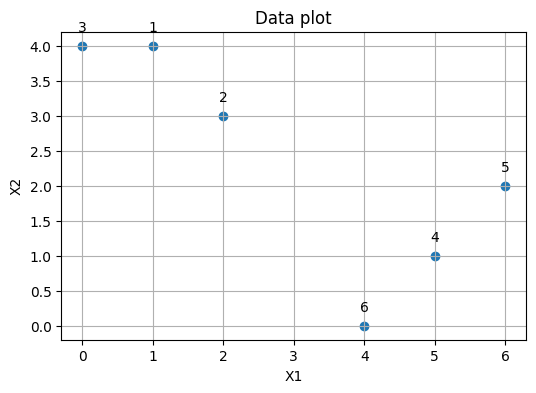

In [41]:
data = {
    'Observation': ['1', '2', '3', '4','5','6'],
    'X1':[1,2,0,5,6,4],
    'X2':[4,3,4,1,2,0]
}

plt.figure(figsize=(6,4))
plt.scatter(data['X1'], data['X2'])
for i, txt in enumerate(data['Observation']):    
    plt.annotate(txt, (data['X1'][i], data['X2'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Data plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()


## (b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [59]:
data['Cluster'] = np.random.choice([0, 1], size=len(data['Observation']))

for i, cluster in enumerate(data['Cluster']):
    print(f"Observation {data['Observation'][i]} : Cluster {cluster}")

Observation 1 : Cluster 1
Observation 2 : Cluster 1
Observation 3 : Cluster 0
Observation 4 : Cluster 0
Observation 5 : Cluster 0
Observation 6 : Cluster 0


## (c) Compute the centroid for each cluster.

In [60]:
data = pd.DataFrame(data)
centroids = data.groupby("Cluster")[["X1","X2"]].mean()
print("Cluster centroids:")
print(centroids)

Cluster centroids:
           X1    X2
Cluster            
0        3.75  1.75
1        1.50  3.50


## (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [61]:
new_labels = []
for i in range(len(data)):
    x, y = data.loc[i, ["X1","X2"]]
    dists = centroids.apply(lambda row: np.sqrt((x-row.X1)**2 + (y-row.X2)**2), axis=1)
    new_labels.append(dists.idxmin())

data['New_cluster'] = new_labels

In [62]:
data

,Observation,X1,X2,Cluster,New_cluster
0,1,1,4,1,1
1,2,2,3,1,1
2,3,0,4,0,1
3,4,5,1,0,0
4,5,6,2,0,0
5,6,4,0,0,0


## (e) Repeat (c) and (d) until the answers obtained stop changing.

In [63]:
while True:
    centroids = data.groupby("Cluster")[["X1","X2"]].mean()
    new_labels = []
    for i in range(len(data)):
        x, y = data.loc[i, ["X1","X2"]]
        dists = centroids.apply(lambda row: np.sqrt((x-row.X1)**2 + (y-row.X2)**2), axis=1)
        new_labels.append(dists.idxmin())

    if all(data["New_cluster"] == new_labels):
        break
    data["New_cluster"] = new_labels


In [76]:
centroids

,X1,X2
Cluster,,
0,3.75,1.75
1,1.50,3.50


In [67]:
print(data)

  Observation  X1  X2  Cluster  New_cluster
0           1   1   4        1            1
1           2   2   3        1            1
2           3   0   4        0            1
3           4   5   1        0            0
4           5   6   2        0            0
5           6   4   0        0            0


## (f) In your plot from (a), color the observations according to the cluster labels obtained.

In [72]:
print(data.columns)                 # 確認欄位名稱
print(data['New_cluster'].unique()) # 看 New_cluster 裡到底是什麼值
print(data['New_cluster'].dtype)

Index(['Observation', 'X1', 'X2', 'Cluster', 'New_cluster'], dtype='object')
[1 0]
int64


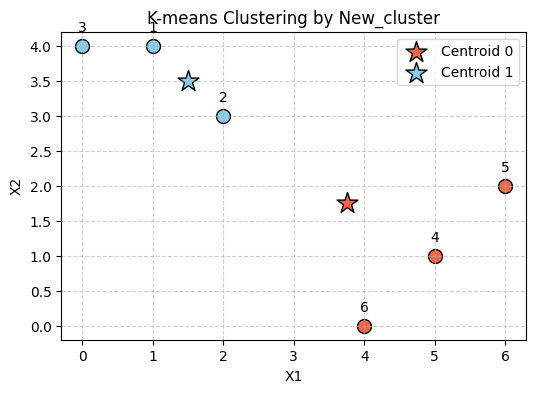

In [73]:
colors = {0: "tomato", 1: "skyblue"}

plt.figure(figsize=(6,4))

for _, row in data.iterrows():
    plt.scatter(row['X1'], row['X2'],
                color=colors[int(row['New_cluster'])],
                edgecolor="black", s=100)
    plt.annotate(row['Observation'],
                 (row['X1'], row['X2']),
                 textcoords="offset points", xytext=(0,10), ha='center')

for cluster, row in centroids.iterrows():
    plt.scatter(row['X1'], row['X2'],
                marker="*", s=250,
                color=colors[cluster], edgecolor="black",
                label=f"Centroid {cluster}")

plt.title('K-means Clustering by New_cluster')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()